Jane Austen is a great English Author during the 18th and 19th century. Her famous books are Pride and Prejudice and Sense and Sensibility. I want to dive deeper into her books and compare them with each other. 

In [12]:
# Import library
import glob
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
# ... YOUR CODE FOR TASK 1 ...
files.sort()
files

['datasets\\Emma.txt',
 'datasets\\LadySusan.txt',
 'datasets\\LoveAndFriendship.txt',
 'datasets\\MansfieldPark.txt',
 'datasets\\NorthangerAbbey.txt',
 'datasets\\Persuasion.txt',
 'datasets\\PrideAndPrejudice.txt',
 'datasets\\SenseAndSensibility.txt']

In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []


for n in files:
    # Open each file
    f = open(n, encoding = 'utf-8-sig')
    # Remove all non-alpha-numeric characters
    # ... YOUR CODE FOR TASK 2 ...

    data = re.sub('[\W_]+',' ', f.read())
    # Store the texts and titles of the books in two separate lists
    # ... YOUR CODE FOR TASK 2 ...
    # ... YOUR CODE FOR TASK 2 ...
    titles.append(os.path.basename(n).replace('.txt', ''))
    txts.append(data)
    
[len(t) for t in txts]

[864932, 142030, 198420, 871646, 436815, 467832, 678096, 664669]

The above is the word length of each novel. The title of the novels are: Emma 	LadySusan 	LoveAndFriendship 	MansfieldPark 	NorthangerAbbey 	Persuasion 	PrideAndPrejudice 	SenseAndSensibility

In [3]:
# Getting the English stop words from nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Printing out the first eight stop words
# ... YOUR CODE FOR TASK 6 ...
print(sw)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alloq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',

In [4]:
# Convert the text to lower case 
txts_lower_case = [word.lower() for word in txts]

# Transform the text into tokens 
txts_split = [word_lower.split() for word_lower in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in sw]for txt in txts_split]
texts[4][:20]

['project',
 'gutenberg',
 'ebook',
 'northanger',
 'abbey',
 'jane',
 'austen',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use']

In [5]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
bows = [dictionary.doc2bow(text) for text in texts]
bows[4][:5]

[(0, 2), (1, 1), (2, 47), (3, 2), (4, 1)]

Tf-Idf stands for term frequency–inverse document frequency. This is to measure the weight of the word in a document. There is a formula of calculating the Tf-Idf score of the words. Most high Tf-Idf scores are from the character names.


In [6]:
from gensim.models import TfidfModel
from gensim import similarities
import pandas as pd

#Find the Tfidf(term frequency-inverse document frequency) of the dictionary words. The model defines the importance of each word.
model = model = TfidfModel(bows)
# Compute the similarity matrix (pairwise distance between all texts).
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))
# Add the titles of the books as columns and index of the dataframe
# ... YOUR CODE FOR TASK 10 ...
sim_df.columns = titles
sim_df.index = titles
# Print the resulting matrix
# ... YOUR CODE FOR TASK 10 ...
sim_df

,Emma,LadySusan,LoveAndFriendship,MansfieldPark,NorthangerAbbey,Persuasion,PrideAndPrejudice,SenseAndSensibility
Emma,1.000000,0.002089,0.005796,0.002941,0.015943,0.003237,0.002675,0.001963
LadySusan,0.002089,0.999999,0.010532,0.010664,0.006733,0.001371,0.003680,0.000975
LoveAndFriendship,0.005796,0.010532,1.000000,0.013963,0.010107,0.041572,0.012347,0.042602
MansfieldPark,0.002941,0.010664,0.013963,1.000000,0.004430,0.006892,0.003036,0.008421
NorthangerAbbey,0.015943,0.006733,0.010107,0.004430,1.000000,0.005187,0.013775,0.002445
Persuasion,0.003237,0.001371,0.041572,0.006892,0.005187,1.000000,0.011790,0.002368
PrideAndPrejudice,0.002675,0.003680,0.012347,0.003036,0.013775,0.011790,0.999998,0.002542
SenseAndSensibility,0.001963,0.000975,0.042602,0.008421,0.002445,0.002368,0.002542,1.000003


No strong correlations between these books which means the books present different meaning and vocabularies

In [7]:
# Convert the tf-idf model into a DataFrame
for i, title in enumerate(titles):
    df_tfidf = pd.DataFrame(model[bows][i], columns = ['id', 'score'])

# Name the columns of the DataFrame id and score
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf
# Add the tokens corresponding to the numerical indices for better readability
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])
    df_tfidf['title'] = title
# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf = df_tfidf.sort_values('score', ascending = False)
    
    print(df_tfidf)

        id     score         token title
5399  7090  0.438369        weston  Emma
1715  2209  0.408840          emma  Emma
2880  3740  0.387558     knightley  Emma
1706  2198  0.385565         elton  Emma
5458  7176  0.313832     woodhouse  Emma
2376  3106  0.237785       harriet  Emma
814   1063  0.223170     churchill  Emma
1948  2529  0.160071       fairfax  Emma
2380  3111  0.159407     hartfield  Emma
464    635  0.147451         bates  Emma
2450  3192  0.124537      highbury  Emma
3936  5207  0.089666      randalls  Emma
3558  4714  0.079703         perry  Emma
891   1151  0.060774          cole  Emma
2265  2957  0.058781       goddard  Emma
1574  2030  0.048818       donwell  Emma
2159  2814  0.046839         frank  Emma
2824  3666  0.045829      isabella  Emma
1558  2008  0.044833         dixon  Emma
1778  2293  0.035867      enscombe  Emma
690    907  0.033874      campbell  Emma
4880  6426  0.032546        taylor  Emma
3072  4021  0.030885         maple  Emma
3082  4036  0.02

         id     score             token          title
4375   9517  0.638690          crawford  MansfieldPark
4557   9699  0.434943            edmund  MansfieldPark
3728   8266  0.325503             fanny  MansfieldPark
4118   9260  0.287147           bertram  MansfieldPark
5605  10747  0.230140         rushworth  MansfieldPark
5221  10363  0.220638            norris  MansfieldPark
5113  10255  0.199525         mansfield  MansfieldPark
3881   8927  0.163824            thomas  MansfieldPark
3768   8454  0.096419             julia  MansfieldPark
1425   2996  0.074692             grant  MansfieldPark
6164  11306  0.069675             yates  MansfieldPark
5753  10895  0.057007         sotherton  MansfieldPark
4119   9261  0.036949          bertrams  MansfieldPark
3572   7699  0.036848             susan  MansfieldPark
4123   9265  0.033782            betsey  MansfieldPark
5369  10511  0.031671        portsmouth  MansfieldPark
3086   6553  0.030967               tom  MansfieldPark
3507   756

         id     score          token              title
4179  13493  0.560700          darcy  PrideAndPrejudice
4067  13381  0.433269         bennet  PrideAndPrejudice
4073  13387  0.410465        bingley  PrideAndPrejudice
4728  14042  0.260229        wickham  PrideAndPrejudice
4134  13448  0.241450        collins  PrideAndPrejudice
4409  13723  0.229377          lydia  PrideAndPrejudice
880    2194  0.192523      elizabeth  PrideAndPrejudice
4298  13612  0.130115       gardiner  PrideAndPrejudice
4402  13716  0.130115          lizzy  PrideAndPrejudice
4403  13717  0.118042      longbourn  PrideAndPrejudice
4442  13756  0.097921    netherfield  PrideAndPrejudice
4406  13720  0.093897          lucas  PrideAndPrejudice
4417  13731  0.076459        meryton  PrideAndPrejudice
4484  13798  0.071094      pemberley  PrideAndPrejudice
4582  13896  0.065728        rosings  PrideAndPrejudice
1477   3734  0.063492          kitty  PrideAndPrejudice
4337  13651  0.054997  hertfordshire  PrideAndPr

Text(0.5,1,'Similarity Value for Persuasion')

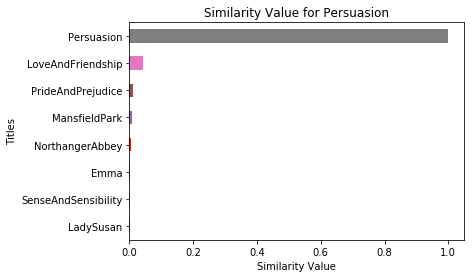

In [11]:
# This is needed to display plots in a notebook
%matplotlib inline

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['Persuasion'] 

# Sort by ascending scores
v_sorted = v.sort_values(ascending = True)

# Plot this data has a horizontal bar plot
# ... YOUR CODE FOR TASK 11 ...
v_sorted.plot.barh(x = 'lab', y = 'val', rot = 0).plot
# Modify the axes labels and plot title for a better readability
# ... YOUR CODE FOR TASK 11 ...
plt.xlabel('Similarity Value')
plt.ylabel('Titles')
plt.title('Similarity Value for Persuasion')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [12.5, 12.5, 51.25, 51.25]],
 'dcoord': [[0.0, 1.354642314607688, 1.354642314607688, 0.0],
  [0.0, 1.3933342981690715, 1.3933342981690715, 1.354642314607688],
  [0.0, 1.399169506624156, 1.399169506624156, 0.0],
  [0.0, 1.3917274264268684, 1.3917274264268684, 0.0],
  [0.0, 1.4062943205495146, 1.4062943205495146, 1.3917274264268684],
  [1.399169506624156,
   1.4225465774395338,
   1.4225465774395338,
   1.4062943205495146],
  [1.3933342981690715,
   1.4451375893650642,
   1.4451375893650642,
   1.4225465774395338]],
 'ivl': ['Persuasion',
  'LoveAndFriendship',
  'SenseAndSensibility',
  'LadySusan',
  'MansfieldPark',
  'PrideAndPrejudice',
  'Emma',
  'NorthangerAbbey'],
 'leaves': [5, 2, 7, 1, 3, 6, 0, 4],
 'color_list': ['b', 'b', 'b', 'b', 'b', 'b', 'b']}

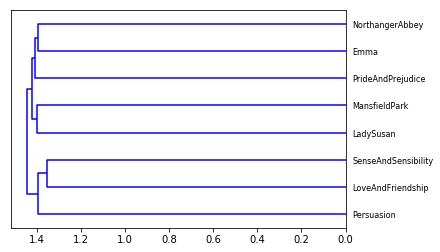

In [9]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
# ... YOUR CODE FOR TASK 12 ...
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation="left")

There is no strong correlation and the Tf-Idf score is high on most of the character names. These are not good indicators for drawing conclusions. More techniques and investigations should be used.

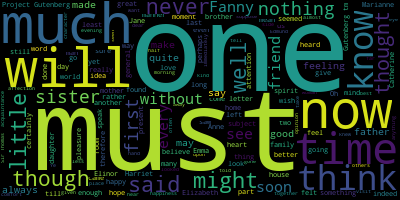

In [10]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
long_string = ' '.join(txts)

wordcloud.generate(long_string)
wordcloud.to_image()

The word cloud showing the most frequent word used by Jane Austen, similar to Charles Dickens, she used 'one' the most followed by 'must'. Other words such as 'will' and 'now' represent the second most count. Other popular words from Dicken are 'say' and 'little'.